This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-11-29 20:30:50--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-29 20:30:51--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5a7197eafc9515c63d43105dd.dl.dropboxusercontent.com/cd/0/inline/Ba62OJDrrPE4oDSm_0J867E2TlmHZvHBOqWgVywvxmbWHHJYbE5q1e20M6Fz1j26vrs3AFjEiVAqt5xEAAl-sppx-QnWyKBQVvYgfVpR1mnUA1m7jLdo0hJGFsx42AbUkGtK_kkeO0WJlueeMv5bLPsA/file# [following]
--2021-11-29 20:30:51--  https://uca5a7197eafc9515c63d43105dd.dl.dropboxusercontent.com/cd/0/inline/Ba62OJDrrPE4oDSm_0J867E2TlmHZvHBOqWgVywvxmbWHHJYbE5q1e20M6Fz1j26vrs3AFjEiVAqt5xEAAl-sppx-QnWyKBQVvYgfVpR1mn

In [3]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [6]:
file_path="data/data_000637.txt"
data=pd.read_csv(file_path)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [7]:
x = data['BX_COUNTER'].max()
print('X: ', x)

X:  3563


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [8]:
data['time_ns'] = (data['ORBIT_CNT']*x+data['BX_COUNTER'])*25
data_ac = data['time_ns'].max() - data['time_ns'].min()
print('data took:',data_ac,'ns')



data took: 980141175 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [9]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,344649004934875
1,1,0,124,3869200167,2374,27,344649004934875
2,1,0,63,3869200167,2553,28,344649004939350
3,1,0,64,3869200167,2558,19,344649004939475
4,1,0,64,3869200167,2760,25,344649004944525
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,344649985075875
1310716,1,1,4,3869211171,763,11,344649985075900
1310717,1,0,64,3869211171,764,0,344649985075925
1310718,1,0,139,3869211171,769,0,344649985076050


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [10]:
d = data.groupby('TDC_CHANNEL').sum()
d = d.sort_values(by='TDC_MEAS', ascending=False)
d.head()

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
TDC_CHANNEL,,,,,,
64,66020.0,1439.0,2.554450e+14,117767051.0,962195.0,2.275376e+19
63,64642.0,918.0,2.501132e+14,115482430.0,938192.0,2.227884e+19
62,49349.0,1074.0,1.909415e+14,87956183.0,719092.0,1.700811e+19
61,49479.0,780.0,1.914445e+14,88234674.0,719044.0,1.705291e+19
60,45736.0,1473.0,1.769620e+14,81237774.0,662400.0,1.576289e+19


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [11]:
unique = data['ORBIT_CNT'].unique().shape[0]
print("Unique: ", unique)
tdc139 = data[data['TDC_CHANNEL'] == 139]
unique = tdc139['ORBIT_CNT'].unique().shape[0]
print("Unique TDC_CHANNEL = 139: ", unique)

Unique:  11001
Unique TDC_CHANNEL = 139:  10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<AxesSubplot:xlabel='TDC_CHANNEL'>

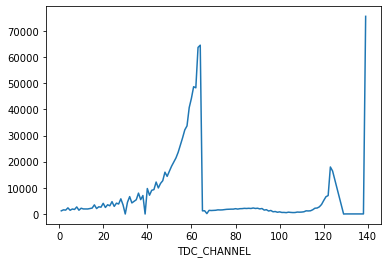

In [12]:
%matplotlib inline
FPGA_0 = data[data['FPGA'] == 0]
gp = FPGA_0.groupby('TDC_CHANNEL').count()
gp['HEAD'].plot()